# tasks

## Load Your Saved Joblib File
- Create a new notebook for this assignment in your project 1 repository. Name the notebook "Explaining Models with Shap.ipynb"
- In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."
- Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
os.makedirs("images/", exist_ok=True)
import matplotlib.pyplot as plt
import joblib
loaded_joblib = joblib.load("best_models.joblib")
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForestRegressor', 'LinearRegression'])

In [134]:
## Saving the dictionary data into separate variables
X_train = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test  = loaded_joblib['X_test']
y_test  = loaded_joblib['y_test']
##  Saving the model and processing tools to new vars
rf_reg  = loaded_joblib['RandomForestRegressor']
lin_reg  = loaded_joblib['LinearRegression']#not needed for assingment but instanciated anyways.

preprocessor = loaded_joblib['preprocessor']

## Explain your tree-based model with shap:
- Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
- Create a model explainer
- Calculate the shap values for your model.
- Create a summary plot - with plot_type='bar':
    - In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
        - Are they the same features in both? If not, what's different?
    - Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
- Create a second summary plot - with plot_type='dot'
    - In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

In [135]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [136]:
#Create an X_shap and y_shap variable from your training data.
X_shap = shap.sample(X_train,nsamples=400,random_state=321)
X_shap


 

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Low Fat  \
4469     7.720000         0.074669   76.3986                       0.0   
4438     5.110000         0.034868  163.8210                       1.0   
366      8.050000         0.078386  256.4646                       0.0   
2219     8.760000         0.050131  128.3336                       1.0   
6080     6.590000         0.176748   82.7908                       1.0   
...           ...              ...       ...                       ...   
215      6.670000         0.150555  130.0626                       0.0   
4680    14.300000         0.034383   96.5726                       0.0   
1288    16.000000         0.041029  142.6496                       1.0   
3635    12.822634         0.113213  254.6040                       1.0   
7936     7.365000         0.042626  227.0720                       1.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
4469                     0.0               1.0                  0.0   
4438                     0.0               0.0                  0.0   
366                      0.0               0.0                  0.0   
2219                     0.0               0.0                  0.0   
6080                     0.0               0.0                  0.0   
...                      ...               ...                  ...   
215                      0.0               0.0                  0.0   
4680                     1.0               0.0                  0.0   
1288                     0.0               0.0                  0.0   
3635                     0.0               0.0                  0.0   
7936                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
4469               0.0              0.0                     0.0  ...   
4438               0.0              0.0                     0.0  ...   
366                0.0              0.0                     0.0  ...   
2219               0.0              0.0                     0.0  ...   
6080               0.0              0.0                     0.0  ...   
...                ...              ...                     ...  ...   
215                0.0              0.0                     0.0  ...   
4680               0.0              0.0                     0.0  ...   
1288               0.0              0.0                     0.0  ...   
3635               0.0              0.0                     0.0  ...   
7936               0.0              0.0                     0.0  ...   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
4469                           0.0                  0.0             0.0   
4438                           0.0                  1.0             0.0   
366                            0.0                  0.0             0.0   
2219                           1.0                  0.0             0.0   
6080                           0.0                  0.0             0.0   
...                            ...                  ...             ...   
215                            0.0                  0.0             0.0   
4680                           0.0                  0.0             0.0   
1288                           0.0                  0.0             0.0   
3635                           0.0                  0.0             0.0   
7936                           0.0                  0.0             0.0   

      Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
4469                0.0                    0.0                    0.0   
4438                0.0                    0.0                    0.0   
366                 0.0                    0.0                    0.0   
2219                0.0                    0.0                    0.0   
6080                0.0                    0.0                    0.0   
...                 ...                    ...              

In [137]:
y_shap = y_train.loc[X_shap.index].astype(int)
y_shap

4469    1402
4438    2120
366     5153
2219    2556
6080      83
        ... 
215      131
4680    2251
1288    1834
3635     759
7936    4074
Name: Item_Outlet_Sales, Length: 400, dtype: int32

In [138]:
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)
X_shap

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Low Fat  \
0       7.720000         0.074669   76.3986                       0.0   
1       5.110000         0.034868  163.8210                       1.0   
2       8.050000         0.078386  256.4646                       0.0   
3       8.760000         0.050131  128.3336                       1.0   
4       6.590000         0.176748   82.7908                       1.0   
..           ...              ...       ...                       ...   
395     6.670000         0.150555  130.0626                       0.0   
396    14.300000         0.034383   96.5726                       0.0   
397    16.000000         0.041029  142.6496                       1.0   
398    12.822634         0.113213  254.6040                       1.0   
399     7.365000         0.042626  227.0720                       1.0   

     Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                       0.0               1.0                  0.0   
1                       0.0               0.0                  0.0   
2                       0.0               0.0                  0.0   
3                       0.0               0.0                  0.0   
4                       0.0               0.0                  0.0   
..                      ...               ...                  ...   
395                     0.0               0.0                  0.0   
396                     1.0               0.0                  0.0   
397                     0.0               0.0                  0.0   
398                     0.0               0.0                  0.0   
399                     0.0               0.0                  0.0   

     Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
0                 0.0              0.0                     0.0  ...   
1                 0.0              0.0                     0.0  ...   
2                 0.0              0.0                     0.0  ...   
3                 0.0              0.0                     0.0  ...   
4                 0.0              0.0                     0.0  ...   
..                ...              ...                     ...  ...   
395               0.0              0.0                     0.0  ...   
396               0.0              0.0                     0.0  ...   
397               0.0              0.0                     0.0  ...   
398               0.0              0.0                     0.0  ...   
399               0.0              0.0                     0.0  ...   

     Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                             0.0                  0.0             0.0   
1                             0.0                  1.0             0.0   
2                             0.0                  0.0             0.0   
3                             1.0                  0.0             0.0   
4                             0.0                  0.0             0.0   
..                            ...                  ...             ...   
395                           0.0                  0.0             0.0   
396                           0.0                  0.0             0.0   
397                           0.0                  0.0             0.0   
398                           0.0                  0.0             0.0   
399                           0.0                  0.0             0.0   

     Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
0                  0.0                    0.0                    0.0   
1                  0.0                    0.0                    0.0   
2                  0.0                    0.0                    0.0   
3                  0.0                    0.0                    0.0   
4                  0.0                    0.0                    0.0   
..                 ...                    ...                    ...   
395                0.0                   

In [139]:
# create model explainer
explainer = shap.Explainer(rf_reg)
explainer

In [140]:
## Getting the shap values
shap_values = explainer(X_shap)
type(shap_values)

shap._explanation.Explanation

In [141]:
# confirming shap values are 2 dimension
shap_values.shape

(400, 22)

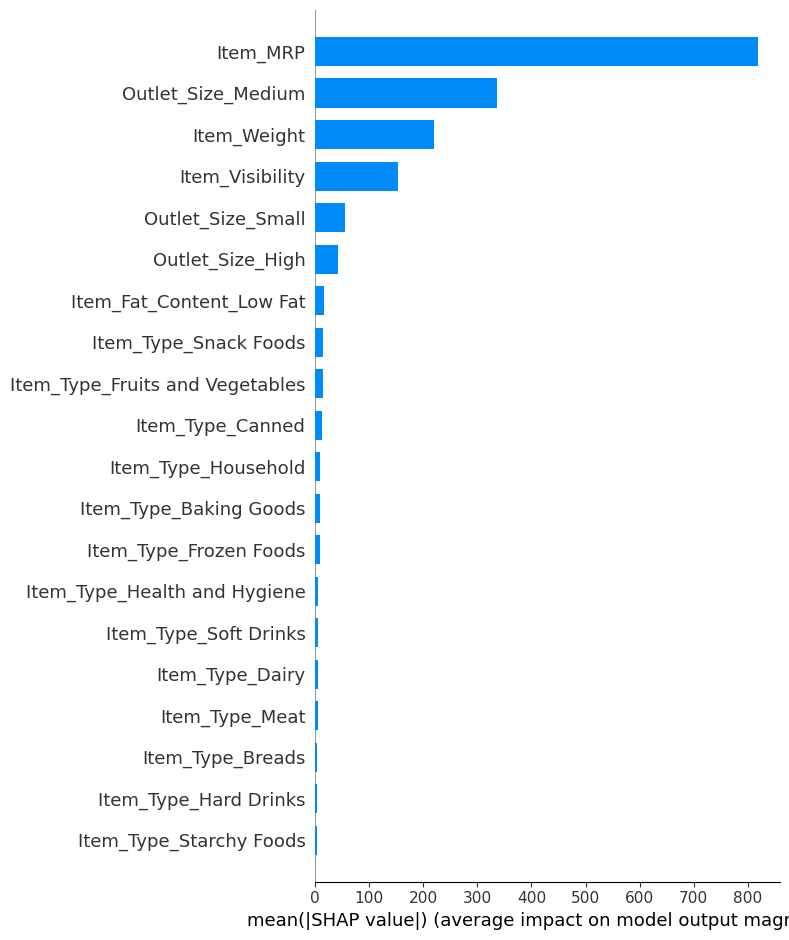

In [142]:
#Create a summary plot - with plot_type='bar':
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')
# Save your figure as a .png file inside your repository
fig.savefig('images/summary_plot_1.png')

### feature importance  plot.
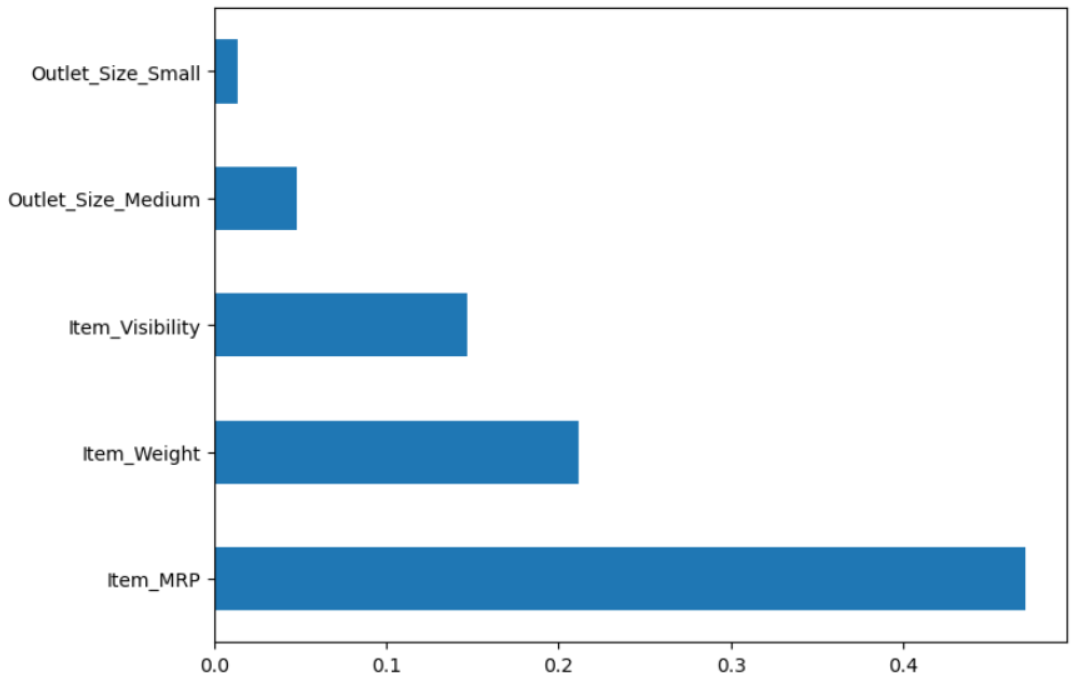

- the two visuals echo the same importances with one exception.
    - noteably the outlet size medium has been promoted  two levels of importance than in the previous visual.
    - while item_mrp remains ahead of the pack by double in both cases.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


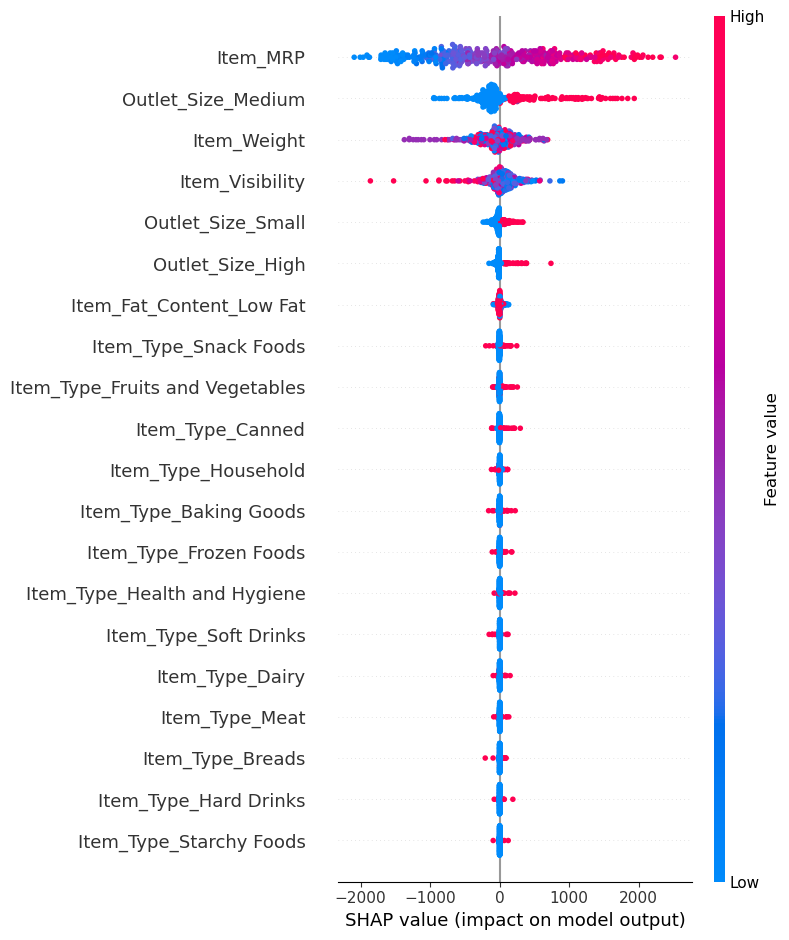

In [143]:
#Create a second summary plot - with plot_type='dot'
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap)
# Save your figure as a .png file inside your repository
fig.savefig('images/summary_plot_2.png')

### interpret the top 3 most important features and how they influence your model's predictions.
1. item_mrp:
    - the higher an items mrp(red),the more likely it is to positivly impact our predictive model.  
2. outlet_size_medium:
    - the  higher count of medium size stores(red)  will positivly impact our prediction.
3. item_weight:
    - a central cluster of our valaues with mixed feature value colors indicates an average/typical impact on the model predictions.


# Local Explanations(Core) 

### tasks
- Select at least 2 example rows based on the insights gained from your previous core assignments this week.
- Explain why you selected the examples that you did.
    - If you're having trouble thinking of which type of examples to select, try selecting a store that had low sales ( one of the lowest values for your target) and one with high sales (the highest values for your target).
- For each example, produce :
    - A Lime tabular explanation
        - Interpret what features most heavily influenced the predictions, according to LIME.
        - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: You will need to take a screenshot to save the lime explanation.
- An individual Force Plot
    - Interpret what features most heavily influenced the predictions, according to SHAP.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: You will need to take a screenshot to save the individual force plot.


## Update your README.
- Add your explanation for why you selected the individual examples that you visualized.
- For each example (need at least 2 examples)
    - A Lime tabular explanation
        - Your corresponding interpretation
    - A sharp force plot
- Your corresponding interpretation.

In [154]:
X_shap = shap.sample(X_train, nsamples=200, random_state=321)
X_shap



Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Low Fat  \
4469     7.720000         0.074669   76.3986                       0.0   
4438     5.110000         0.034868  163.8210                       1.0   
366      8.050000         0.078386  256.4646                       0.0   
2219     8.760000         0.050131  128.3336                       1.0   
6080     6.590000         0.176748   82.7908                       1.0   
...           ...              ...       ...                       ...   
7261     7.810000         0.067837  246.1486                       1.0   
7617    12.822634         0.036214   92.5488                       1.0   
534     13.350000         0.140241  150.2392                       1.0   
1142    12.822634         0.014019  178.1344                       0.0   
2841     9.695000         0.128806  224.0404                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
4469                     0.0               1.0                  0.0   
4438                     0.0               0.0                  0.0   
366                      0.0               0.0                  0.0   
2219                     0.0               0.0                  0.0   
6080                     0.0               0.0                  0.0   
...                      ...               ...                  ...   
7261                     0.0               0.0                  0.0   
7617                     0.0               0.0                  0.0   
534                      0.0               0.0                  0.0   
1142                     0.0               0.0                  0.0   
2841                     1.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
4469               0.0              0.0                     0.0  ...   
4438               0.0              0.0                     0.0  ...   
366                0.0              0.0                     0.0  ...   
2219               0.0              0.0                     0.0  ...   
6080               0.0              0.0                     0.0  ...   
...                ...              ...                     ...  ...   
7261               0.0              0.0                     0.0  ...   
7617               0.0              0.0                     0.0  ...   
534                0.0              0.0                     1.0  ...   
1142               0.0              0.0                     1.0  ...   
2841               0.0              0.0                     0.0  ...   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
4469                           0.0                  0.0             0.0   
4438                           0.0                  1.0             0.0   
366                            0.0                  0.0             0.0   
2219                           1.0                  0.0             0.0   
6080                           0.0                  0.0             0.0   
...                            ...                  ...             ...   
7261                           0.0                  0.0             0.0   
7617                           0.0                  0.0             0.0   
534                            0.0                  0.0             0.0   
1142                           0.0                  0.0             0.0   
2841                           0.0                  0.0             0.0   

      Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
4469                0.0                    0.0                    0.0   
4438                0.0                    0.0                    0.0   
366                 0.0                    0.0                    0.0   
2219                0.0                    0.0                    0.0   
6080                0.0                    0.0                    0.0   
...                 ...                    ...              

In [155]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap



4469    1402.1748
4438    2120.5730
366     5153.2920
2219    2556.6720
6080      83.8908
          ...    
7261    5375.6692
7617    2625.9152
534     2684.5056
1142    3747.1224
2841    5851.0504
Name: Item_Outlet_Sales, Length: 200, dtype: float64

In [158]:
## Resetting the index for sampled data to match shap_values integer index
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)

In [159]:
explainer = shap.Explainer(rf_reg)
explainer

In [160]:
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(200, 22)

In [161]:
X_shap.shape

(200, 22)

In [162]:
## Global Force Plot 
shap.force_plot(explainer.expected_value, shap_values.values, features=X_shap)



## Selected Features
- item_mrp (selected since it is ranked as the most impactful to predictions.)
- item_weight(selected since the values reflected in the summary plot are bunched up and could use additional clerification.)
- item_visibility(selected to gain additional insight on store placement combined with parameters above leading to higher/lower sales)
the combinatiuons above can give additional insight on larger/bulkier items costing less VS smaller items that cost more and if placement has an overall impact  to the two features.


## creating filters 

median    131.9613
Name: Item_MRP, dtype: float64

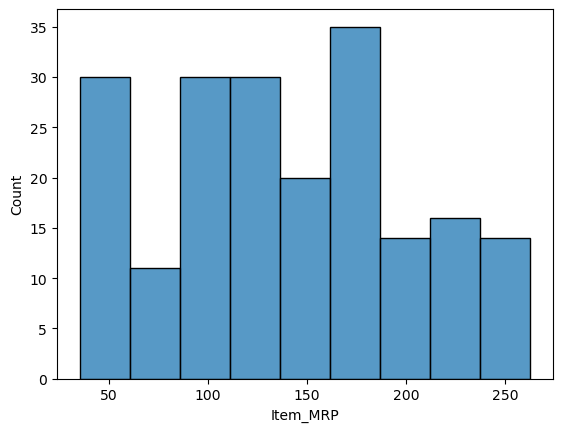

In [164]:
sns.histplot(X_shap['Item_MRP'])
X_shap['Item_MRP'].agg(['median'])

In [165]:
filter_cheap=X_shap['Item_MRP']<139.9613
filter_cheap.value_counts()

True     102
False     98
Name: Item_MRP, dtype: int64

median    12.822634
Name: Item_Weight, dtype: float64

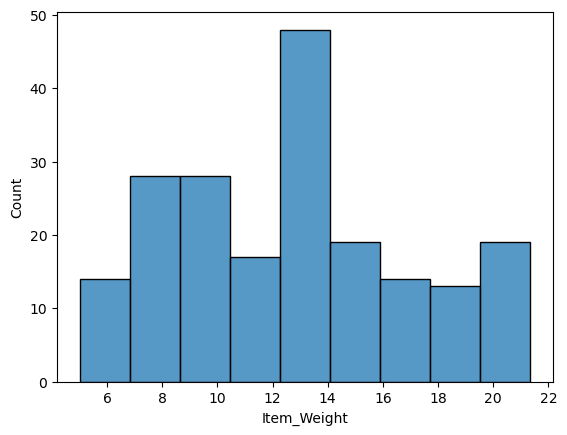

In [166]:
sns.histplot(X_shap['Item_Weight'])
X_shap['Item_Weight'].agg(['median'])

In [167]:
filter_heavy=X_shap['Item_Weight']>12.82
filter_heavy.value_counts()

True     108
False     92
Name: Item_Weight, dtype: int64

median    0.056276
Name: Item_Visibility, dtype: float64

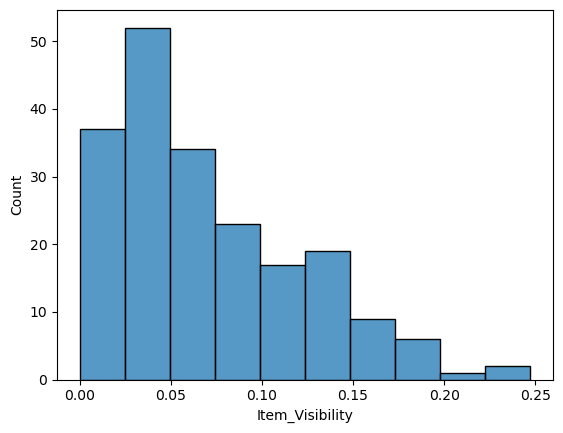

In [168]:
sns.histplot(X_shap['Item_Visibility'])
X_shap['Item_Visibility'].agg(['median'])

In [169]:
filter_invisable=X_shap['Item_Visibility']<0.05
filter_invisable

0      False
1       True
2      False
3      False
4      False
       ...  
195    False
196     True
197    False
198     True
199    False
Name: Item_Visibility, Length: 200, dtype: bool

# first  example to reflect 
- cheaper
- larger
- lower visibility

In [178]:
group_1=X_shap[filter_cheap&filter_heavy&filter_invisable].index
group_1

Int64Index([  8,  22,  30,  43,  46,  51,  61,  77,  95,  96,  97, 105, 122,
            123, 127, 142, 159, 171, 178, 183, 187, 196],
           dtype='int64')

In [179]:
group_1_select=np.random.choice(group_1)
example_group_1=X_shap.loc[group_1_select]
example_group_1.head(3)

Item_Weight         14.800000
Item_Visibility      0.043857
Item_MRP           109.057000
Name: 30, dtype: float64

- index 30 identified as our example_1 for group one visuals



## second example to reflect
- smaller
- more expensive
- better item visibility

In [184]:
group_2=X_shap[~filter_cheap&~filter_heavy&~filter_invisable].index
group_2

Int64Index([  2,  14,  16,  23,  29,  32,  37,  67,  85,  88,  99, 101, 103,
            107, 116, 117, 134, 139, 150, 156, 160, 167, 182, 185, 189, 191,
            195, 199],
           dtype='int64')

In [185]:
group_2_select=np.random.choice(group_2)
example_group_2=X_shap.loc[group_2_select]
example_group_2.head(3)

Item_Weight         12.650000
Item_Visibility      0.063146
Item_MRP           159.657800
Name: 103, dtype: float64

- index 103 identified as our example_2 for group two visuals

## group 1 explanations

In [187]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

In [188]:
## lime tabular explainer group 1
exp = lime_explainer.explain_instance(X_shap.iloc[30],
                                rf_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


### interpretations
- 

In [186]:
## Individual forceplot group 1
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[30].values,
                features=X_shap.iloc[30])

### interpretations
- 

## group 2 explanations

In [189]:
## lime tabular explainer fro group 2
exp = lime_explainer.explain_instance(X_shap.iloc[103],
                                rf_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


### interpretations
- 

In [190]:
## Individual forceplot group 2
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[103].values,
                features=X_shap.iloc[103])

### interpretations
- 